In [2]:
import numpy as np
import pylab as plt
import matplotlib
%matplotlib inline

In [3]:
import numpy as np
import matplotlib as mpl
import pylab
from libtiff import TIFFfile
from libtiff import TIFF
import os
from scipy import interpolate
import pickle

In [4]:
def read(fileName):
    tiff = TIFFfile(fileName)
    samples, sample_names = tiff.get_samples()
    outList = []
    for sample in samples:
        outList.append(np.copy(sample)[...,np.newaxis])
        out = np.concatenate(outList,axis=-1)
        out = np.rollaxis(out,0,3)
        out = np.flipud(out)
        tiff.close()
    return out

In [12]:
from PIL import Image
im = Image.open('before/1/Image14_1.tif')
ima=np.array(im)

im = Image.open('after/1/Image24_1.tif')
imb=np.array(im)

im = Image.open('aftter2/1/Image43_1.tif')
imc=np.array(im)

im = Image.open('after3/1/Image49_1.tif')
imd=np.array(im)

In [84]:
imgnum = 5
spot=1
direc="after3"
def GetData(spot=1,imgnum=5,direc='before'):
    path=direc+"/"+str(spot)+"/"
    stringtofind="_"+str(imgnum)+".tif"
    files=np.array(os.listdir(path))
    filename=files[[stringtofind in p for p in files]]
    im = Image.open(path+filename[0])
    return np.array(im)[200:,200:]


def GetTrend(spot, direc):
    TrendLine=[]
    for i in range(1,200):
        TrendLine.append(sum(sum(GetData(spot,i,direc))))
    return TrendLine

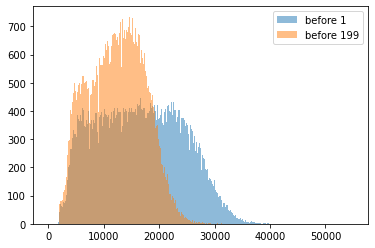

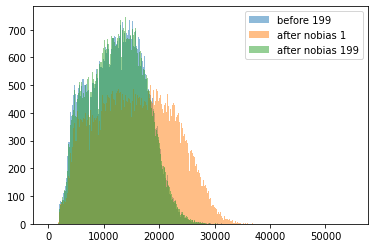

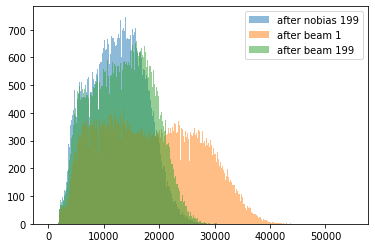

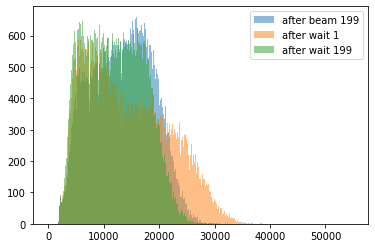

In [128]:
spot=2


plt.hist(GetData(spot,1,'before').flatten(),bins=np.arange(0,55000,100),alpha=0.5,label='before 1')
plt.hist(GetData(spot,199,'before').flatten(),bins=np.arange(0,55000,100),alpha=0.5,label='before 199')
plt.legend(loc='upper right')
plt.show()

plt.hist(GetData(spot,199,'before').flatten(),bins=np.arange(0,55000,100),alpha=0.5,label='before 199')
plt.hist(GetData(spot,1,'after').flatten(),bins=np.arange(0,55000,100),alpha=0.5,label='after nobias 1')
plt.hist(GetData(spot,199,'after').flatten(),bins=np.arange(0,55000,100),alpha=0.5,label='after nobias 199')
plt.legend(loc='upper right')
plt.show()

plt.hist(GetData(spot,199,'after').flatten(),bins=np.arange(0,55000,100),alpha=0.5,label='after nobias 199')
plt.hist(GetData(spot,1,'after2').flatten(),bins=np.arange(0,55000,100),alpha=0.5,label='after beam 1 ')
plt.hist(GetData(spot,199,'after2').flatten(),bins=np.arange(0,55000,100),alpha=0.5,label='after beam 199')
plt.legend(loc='upper right')
plt.show()

plt.hist(GetData(spot,199,'after2').flatten(),bins=np.arange(0,55000,100),alpha=0.5,label='after beam 199')
plt.hist(GetData(spot,1,'after3').flatten(),bins=np.arange(0,55000,100),alpha=0.5,label='after wait 1')
plt.hist(GetData(spot,199,'after3').flatten(),bins=np.arange(0,55000,100),alpha=0.5,label='after wait 199')
plt.legend(loc='upper right')
plt.show()



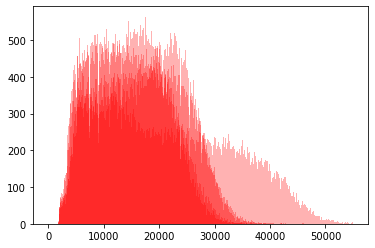

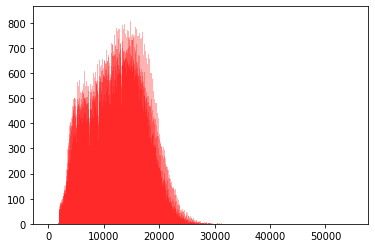

In [118]:
for i in range(1,6):
    plt.hist(GetData(i,1,'before').flatten(),bins=np.arange(0,55000,100),alpha=0.3,label='before '+str(i),color='red')
plt.show()
for i in range(1,6):
    plt.hist(GetData(i,199,'before').flatten(),bins=np.arange(0,55000,100),alpha=0.3,label='before '+str(i),color='red')
plt.show()




    

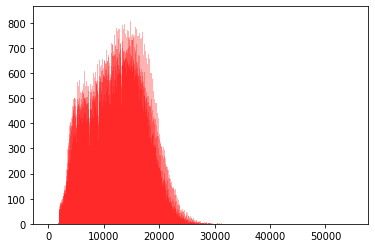

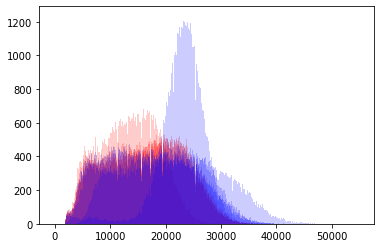

In [121]:
for i in range(1,6):
    plt.hist(GetData(i,199,'before').flatten(),bins=np.arange(0,55000,100),alpha=0.3,label='before '+str(i),color='red')
plt.show()
for i in range(1,6):
    plt.hist(GetData(i,1,'after').flatten(),bins=np.arange(0,55000,100),alpha=0.2,label='before '+str(i),color='red')
for i in range(6,11):
    plt.hist(GetData(i,1,'after').flatten(),bins=np.arange(0,55000,100),alpha=0.2,label='before '+str(i),color='blue')
plt.show()





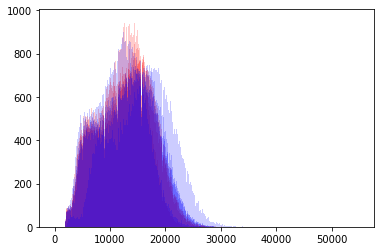

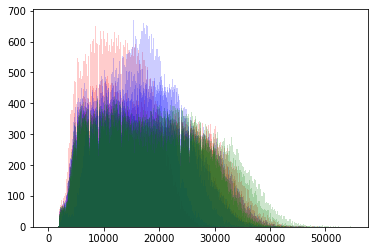

In [122]:
for i in range(1,6):
    plt.hist(GetData(i,199,'after').flatten(),bins=np.arange(0,55000,100),alpha=0.2,label='before '+str(i),color='red')
for i in range(6,11):
    plt.hist(GetData(i,199,'after').flatten(),bins=np.arange(0,55000,100),alpha=0.2,label='before '+str(i),color='blue')
plt.show()

for i in range(1,6):
    plt.hist(GetData(i,1,'after2').flatten(),bins=np.arange(0,55000,100),alpha=0.2,label='before '+str(i),color='red')
for i in range(6,11):
    plt.hist(GetData(i,1,'after2').flatten(),bins=np.arange(0,55000,100),alpha=0.2,label='before '+str(i),color='blue')
for i in range(11,16):
    plt.hist(GetData(i,1,'after2').flatten(),bins=np.arange(0,55000,100),alpha=0.2,label='before '+str(i),color='green')


plt.show()


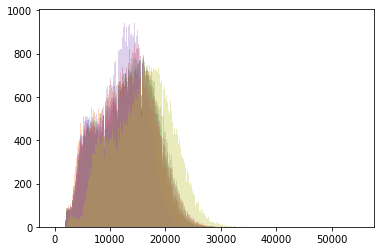

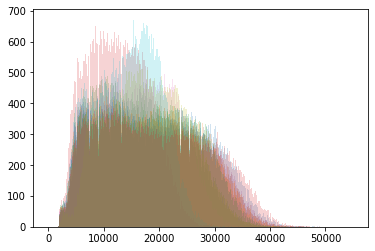

In [113]:
for i in range(1,10):
    plt.hist(GetData(i,199,'after').flatten(),bins=np.arange(0,55000,100),alpha=0.3,label='before '+str(i))
plt.show()
for i in range(1,5):
    plt.hist(GetData(i,1,'after2').flatten(),bins=np.arange(0,55000,100),alpha=0.2,label='before '+str(i),color='red')
plt.show()




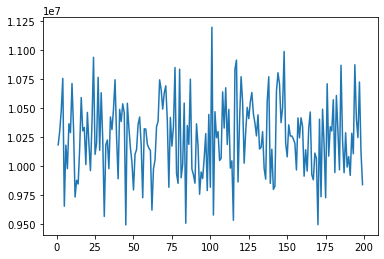

In [87]:
plt.plot(range(1,200),GetTrend(1,"after"))

In [82]:
def MakePlots(spot, imgnum):
    textad=", spot "+str(spot)+ ", img "+str(imgnum)+"."
    try:
        plt.imshow(GetData(spot,imgnum,'before'))
        plt.clim(0,55000)
        plt.title("Before "+textad)
        plt.show()
    except:
        print("No before")
    
    
    try:
        plt.imshow(GetData(spot,imgnum,'after'))
        plt.clim(0,55000)
        plt.title("After NoBias "+textad)
        plt.show()
    except:
        print("No after1")
        
        
    try:
        plt.imshow(GetData(spot,imgnum,'after2'))
        plt.clim(0,55000)
        plt.title("After Beam "+textad)
        plt.show()
    except:
        print("No after2")
        
        
    try:
        plt.imshow(GetData(spot,imgnum,'after3'))
        plt.clim(0,55000)
        plt.title("After Pause "+textad)
        plt.show()


    except:
        print("No after3")



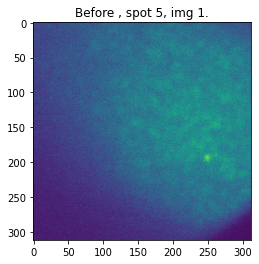

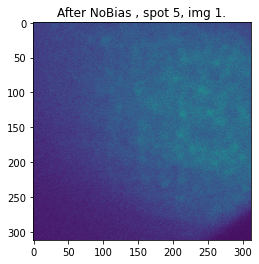

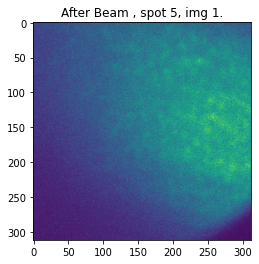

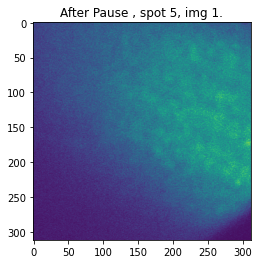

In [83]:
MakePlots(5,1)

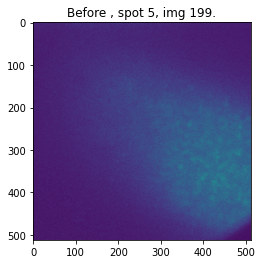

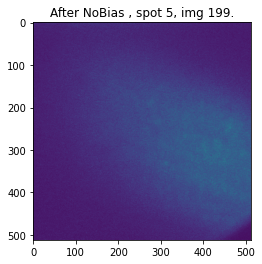

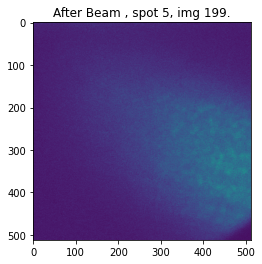

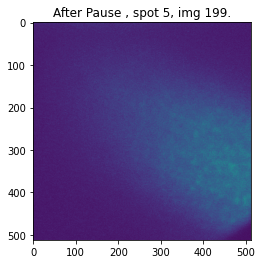

In [74]:
MakePlots(5,199)

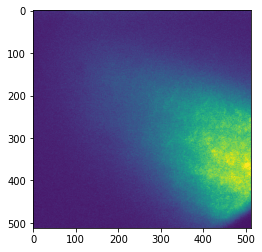

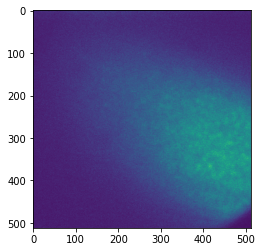

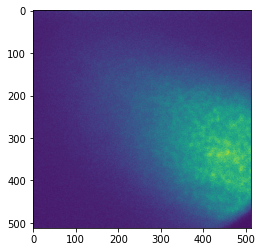

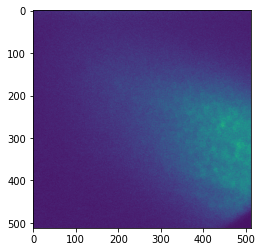

In [13]:

def SweepPlot():



plt.imshow(ima,clim=(0,50000))
plt.show()
plt.imshow(imb,clim=(0,50000))
plt.show()
plt.imshow(imc,clim=(0,50000))
plt.show()
plt.imshow(imd,clim=(0,50000))
plt.show()


